# Определение стоимости автомобилей

 
# Цель исследования
1. Построить модель, которая умеет определять рыночную стоимость автомобиля, а так же умеет качественно предсказывать и быстро обучать и делать предсказания. 


# Ход исследования
Нам предоставленны данные данные о технических характеристиках, комплектации и ценах других автомобилей. Данные находятся в датафрейме, который мы получим из файла '/datasets/autos.csv'. О качестве данных нам ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных. Мы проверим данные на ошибки. Затем, на этапе предобработки мы будем искать возможность исправить все ошибки в данных, которые не приведут к искажению конечного результата. Далее приступим к целям исследования.<br>



Таким образом, исследование пройдёт в девять этапов:<br>

* Обзор данных <br>
* Предобработка данных <br>
* Подготовка выборок
* Обучение разных моделей
* Анализ время обучения, время предсказания и качество моделей
* Выявление лучшей модели 
* Проверка наилучшей модели на тестовой выборке 
* Написание промежуточных выводов <br>
* Написание общего вывода

## Подготовка данных

In [2]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import lightgbm as lgb
from lightgbm import LGBMRegressor
from tqdm.notebook import tqdm
from scipy import stats as st
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

In [3]:
#Загружаем и изучаем датафрейм
try:
    data = pd.read_csv('/datasets/autos.csv')
except:    
    pass

In [3]:
#Ознакамливаемся с датафреймом
data.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
#Переведем названия столбцов в нижний регистр
data.columns = data.columns.str.lower()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   datecrawled        354369 non-null  object
 1   price              354369 non-null  int64 
 2   vehicletype        316879 non-null  object
 3   registrationyear   354369 non-null  int64 
 4   gearbox            334536 non-null  object
 5   power              354369 non-null  int64 
 6   model              334664 non-null  object
 7   kilometer          354369 non-null  int64 
 8   registrationmonth  354369 non-null  int64 
 9   fueltype           321474 non-null  object
 10  brand              354369 non-null  object
 11  repaired           283215 non-null  object
 12  datecreated        354369 non-null  object
 13  numberofpictures   354369 non-null  int64 
 14  postalcode         354369 non-null  int64 
 15  lastseen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
#Переведем названия столбцов в змениный регистр
data = data.rename(columns={'datecrawled':'date_crawled', 
                        'vehicletype':'vehicle_type', 
                        'registrationyear':'registration_year', 
                        'registrationmonth':'registration_month', 
                        'fueltype':'fuel_type',  
                        'datecreated':'date_created',
                        'numberofpictures': 'number_of_pictures',
                        'postalcode':'postal_code',
                        'lastseen':'last_seen'})

In [7]:
#Проверяем количество пропусков в %
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
date_crawled,0.000000
price,0.000000
vehicle_type,11.000000
registration_year,0.000000
gearbox,6.000000
power,0.000000
model,6.000000
kilometer,0.000000
registration_month,0.000000
fuel_type,9.000000


In [8]:
#Проверяем количество явных дубликатов
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 4


In [9]:
#Удаляем явные дубликаты и проверяем на их наличие
data = data.drop_duplicates()
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


In [10]:
#Смотрим максимальное значение в столбце 'date_crawled — дата скачивания анкеты из базы',
#чтобы понимать, какие года рассматриваем

data['date_crawled'].max()

'2016-04-07 14:36:58'

In [11]:
#Удаляем неинформативные признаки
data = data.drop(['date_crawled', 'registration_month', 'date_created', 
                  'number_of_pictures', 'postal_code', 'last_seen'], axis=1)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354365 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              354365 non-null  int64 
 1   vehicle_type       316875 non-null  object
 2   registration_year  354365 non-null  int64 
 3   gearbox            334532 non-null  object
 4   power              354365 non-null  int64 
 5   model              334660 non-null  object
 6   kilometer          354365 non-null  int64 
 7   fuel_type          321470 non-null  object
 8   brand              354365 non-null  object
 9   repaired           283211 non-null  object
dtypes: int64(4), object(6)
memory usage: 29.7+ MB


In [13]:
#Проверяем уникальные значения
for col in data:
    print(data[col].unique())

[  480 18300  9800 ... 12395 18429 10985]
[nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
[1993 2011 2004 2001 2008 1995 1980 2014 1998 2005 1910 2016 2007 2009
 2002 2018 1997 1990 2017 1981 2003 1994 1991 1984 2006 1999 2012 2010
 2000 1992 2013 1996 1985 1989 2015 1982 1976 1983 1973 1111 1969 1971
 1987 1986 1988 1970 1965 1945 1925 1974 1979 1955 1978 1972 1968 1977
 1961 1960 1966 1975 1963 1964 5000 1954 1958 1967 1959 9999 1956 3200
 1000 1941 8888 1500 2200 4100 1962 1929 1957 1940 3000 2066 1949 2019
 1937 1951 1800 1953 1234 8000 5300 9000 2900 6000 5900 5911 1933 1400
 1950 4000 1948 1952 1200 8500 1932 1255 3700 3800 4800 1942 7000 1935
 1936 6500 1923 2290 2500 1930 1001 9450 1944 1943 1934 1938 1688 2800
 1253 1928 1919 5555 5600 1600 2222 1039 9996 1300 8455 1931 1915 4500
 1920 1602 7800 9229 1947 1927 7100 8200 1946 7500 3500]
['manual' 'auto' nan]
[    0   190   163    75    69   102   109    50   125   101   105   140
   115   131    60   136

In [14]:
data.describe()

,price,registration_year,power,kilometer
count,354365.000000,354365.000000,354365.000000,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989
std,4514.176349,90.228466,189.851330,37905.083858
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


Мы загрузили и ознакомились с представленным датафреймом, всего в датафрейме 16 столбцов и 354 369 записи, пропуски были выявлены в следующих признаках: VehicleType - тип автомобильного кузова, Gearbox - тип коробки передач, Model - модель автомобиля, FuelType - тип топлива и Repaired - была машина в ремонте или нет. Так же было обнаружено 4 дубликата, которые мы устранили. Удалили столбцы, которые не пригодятся нам для исследования, теперь в датафрейме 10 столбцов.

In [15]:
#Изучим каждый столбец по отдельности, а так же обработаем пропущенные значения
data['price'].value_counts()

0        10772
500       5670
1500      5394
1000      4648
1200      4594
         ...  
13180        1
10879        1
2683         1
634          1
8188         1
Name: price, Length: 3731, dtype: int64

In [16]:
#Выявили в столбце "price - цена (евро)" нули, удалим их
data = data.query('price > 200')
data['price'].value_counts()

500     5670
1500    5394
1000    4648
1200    4594
2500    4438
        ... 
6220       1
5708       1
4909       1
3630       1
8188       1
Name: price, Length: 3616, dtype: int64

In [17]:
data['price'].sort_values()

290665      202
28094       205
36284       205
183153      209
175108      209
          ...  
332704    20000
291358    20000
255673    20000
197617    20000
43104     20000
Name: price, Length: 334917, dtype: int64

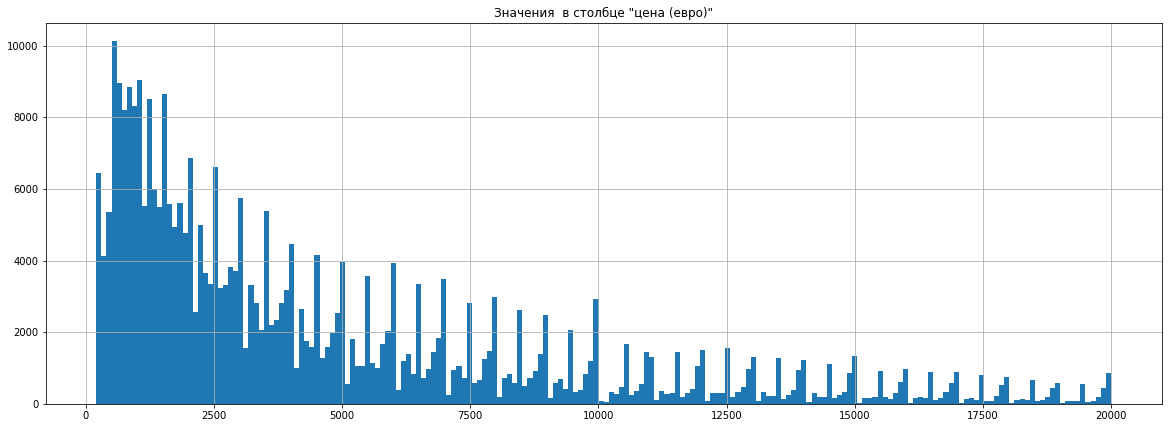

count    334917.000000
mean       4669.992094
std        4515.700301
min         202.000000
25%        1299.000000
50%        2990.000000
75%        6700.000000
max       20000.000000
Name: price, dtype: float64

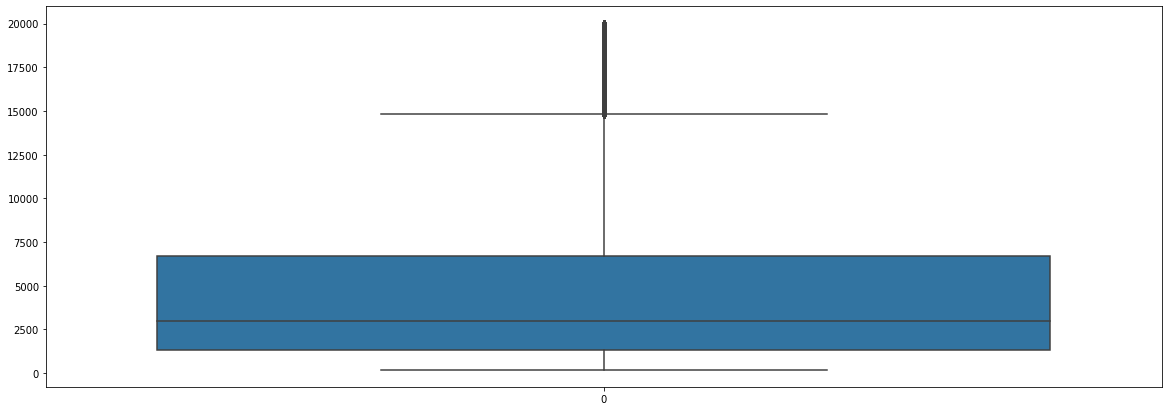

In [18]:
#Изучаю столбец "price - цена (евро)" на гистограмме и ящике с усами
data['price'].hist(bins=200, figsize=(20, 7))
plt.title('Значения  в столбце "цена (евро)"')
plt.show()

plt.figure(figsize=(20, 7))
sns.boxplot(data=data['price'])

data['price'].describe()

Как мы можем наблюдать по ящику с усами, имеются выбросы за пределами верхнего "уса" - свыше 15 000 тысяч евро, данные выбросы мы обрабатывать не будем, так как примем их за "элитный сигмент" в автомобилях.

In [19]:
#В столбце "vehicle_type - тип автомобильного кузова" выявили пропуски, которые составляют 11% от всего датафрейма
data['vehicle_type'].value_counts()

sedan          88275
small          74807
wagon          62913
bus            28183
convertible    19763
coupe          15374
suv            11751
other           2981
Name: vehicle_type, dtype: int64

In [20]:
#Обработаем пропуски, заполнив значением unknown
data['vehicle_type'] = data['vehicle_type'].fillna('unknown')
data['vehicle_type'].isna().sum()

0

В столбце "vehicle_type - тип автомобильного кузова" аномалий не выявлено, пропуски обработаны. 

In [21]:
#Столбец "registration_year — год регистрации автомобиля"
data['registration_year'].value_counts()

2000    21829
1999    21338
2005    21272
2006    19635
2003    19433
        ...  
1946        1
1949        1
5300        1
8888        1
2290        1
Name: registration_year, Length: 134, dtype: int64

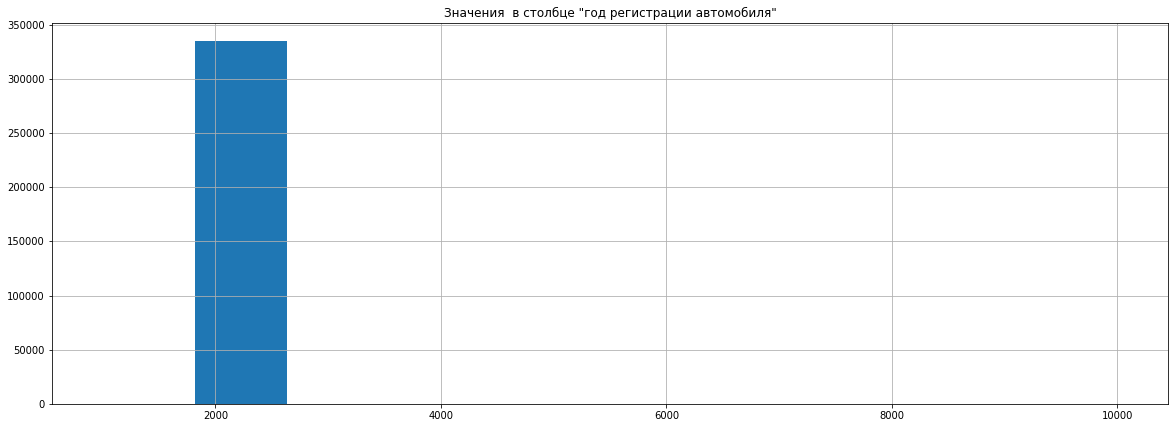

count    334917.000000
mean       2003.977920
std          67.384499
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
max        9999.000000
Name: registration_year, dtype: float64

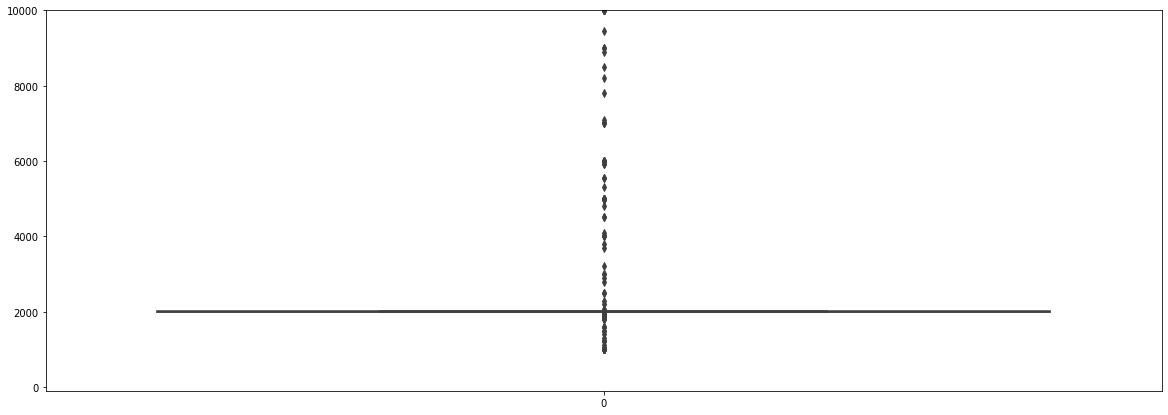

In [22]:
#Изучаю столбец "registration_year — год регистрации автомобиля" на гистограмме и ящике с усами
data['registration_year'].hist(bins=11, figsize=(20, 7))
plt.title('Значения  в столбце "год регистрации автомобиля"')
plt.show()

plt.figure(figsize=(20, 7))
sns.boxplot(data=data['registration_year'])
plt.ylim(-100, 10000)

data['registration_year'].describe()

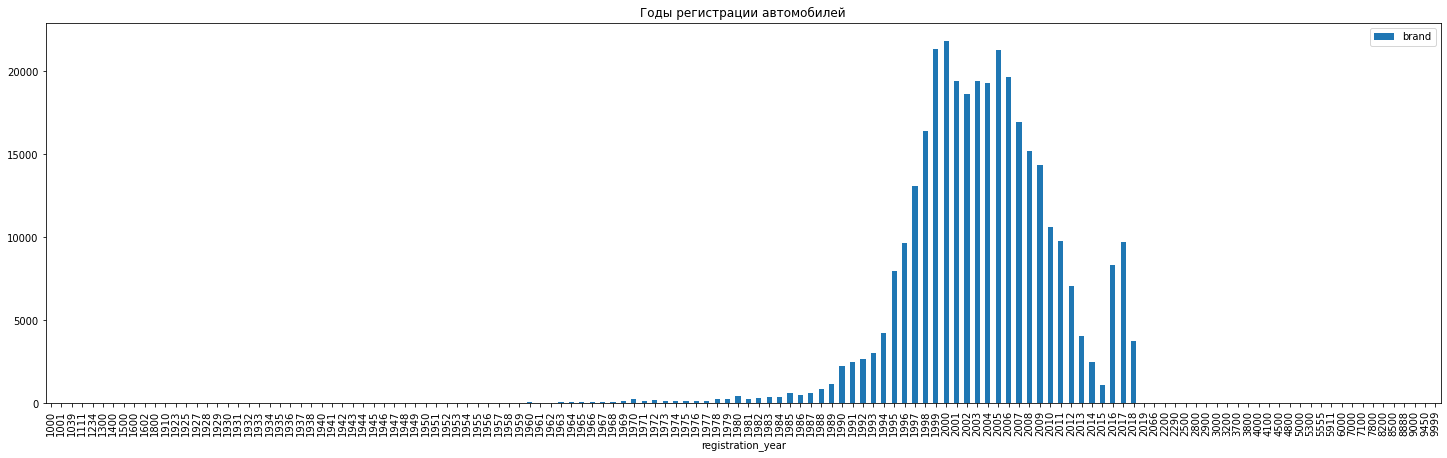

In [23]:
#Применим сводную таблицу для наглядного отображения данных
auto_of_year = data.pivot_table(index='registration_year', values='brand', aggfunc='count')

auto_of_year.plot.bar(figsize=(25, 7))
plt.title('Годы регистрации автомобилей')
plt.show()

In [24]:
#Сделаем срез по годам с 1960 по 2016
data = data.query('1960 <= registration_year <= 2016')
data['registration_year'].describe()

count    321056.000000
mean       2002.745913
std           6.624269
min        1960.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        2016.000000
Name: registration_year, dtype: float64

Как мы могли наблюдать по ящику с усами, у нас присутствовали выбросы за пределами 2000 года, основные года регистрации приходились на 1960-2016 гг., а так же максимальное значение даты в столбце "DateCrawled - дата скачивания анкеты из базы" приходилось на 2016 год, поэтому в датафрейме удалили все значения, которые меньше 1960 и больше 2016 годов регистрации.

In [25]:
#В столбце "gearbox - тип коробки передач", выявили пропуски, которые составляют 6% от всего датафрейма
data['gearbox'].value_counts()

manual    245020
auto       62505
Name: gearbox, dtype: int64

In [26]:
#Заполним пропуски значением unknown
data['gearbox'] = data['gearbox'].fillna('unknown')
data['gearbox'].isna().sum()

0

В столбце "gearbox - тип коробки передач" аномалий не выявлено, пропуски обработаны. 

In [27]:
#Столбец "power - мощность (л. с.)"
data['power'].value_counts()

0        29535
75       21417
60       13916
150      13649
101      12305
         ...  
602          1
685          1
1799         1
15017        1
903          1
Name: power, Length: 675, dtype: int64

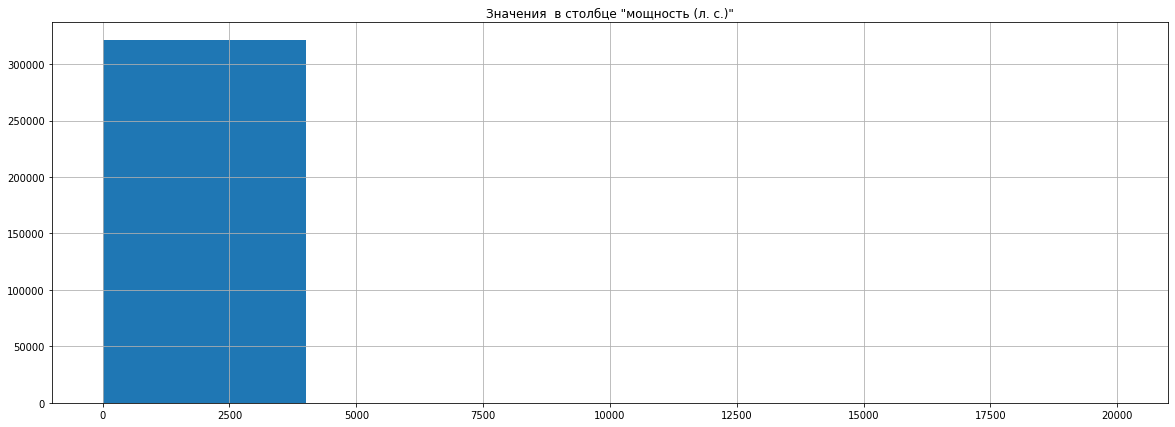

count    321056.000000
mean        113.439238
std         183.980695
min           0.000000
25%          75.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

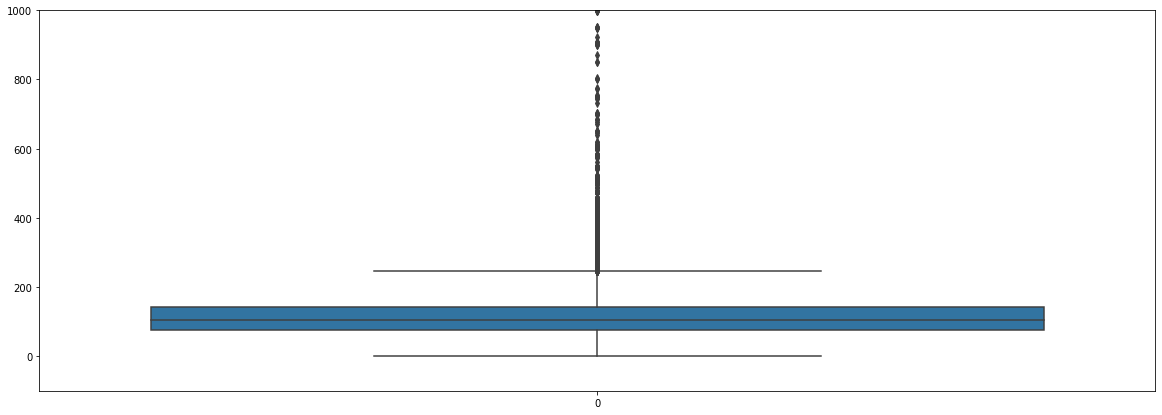

In [28]:
#Изучаю столбец "power - мощность (л. с.)" на гистограмме и ящике с усами
data['power'].hist(bins=5, figsize=(20, 7))
plt.title('Значения  в столбце "мощность (л. с.)"')
plt.show()

plt.figure(figsize=(20, 7))
sns.boxplot(data=data['power'])
plt.ylim(-100, 1000)

data['power'].describe()

Как мы можем наблюдать на ящике с усами, присутствуют значительные выбросы после значения в 300 лошадиных сил.

In [29]:
#Сделаем срез и оставим мощность от 10 до 300 л.с. 
data = data.query('10 <= power <= 300')
data['power'].describe()

count    288074.000000
mean        119.098489
std          48.716998
min          10.000000
25%          78.000000
50%         111.000000
75%         150.000000
max         300.000000
Name: power, dtype: float64

In [30]:
#В столбце "model - модель автомобиля", выявили пропуски, которые составляют 6% от всего датафрейма
data['model'].value_counts()

golf                  24213
other                 19603
3er                   17106
polo                  10211
corsa                  9531
                      ...  
samara                    5
elefantino                4
serie_3                   3
rangerover                2
range_rover_evoque        2
Name: model, Length: 249, dtype: int64

In [31]:
#Заполним пропуски значением unknown
data['model'] = data['model'].fillna('unknown')
data['model'].isna().sum()

0

В столбце "model - модель автомобиля" аномалий не выявлено, пропуски обработаны. 

In [32]:
#Столбец "kilometer - пробег (км)"
data['kilometer'].value_counts()

150000    190188
125000     31169
100000     12561
90000      10157
80000       8909
70000       7725
60000       6786
50000       5594
40000       4467
30000       3840
20000       3180
5000        2607
10000        891
Name: kilometer, dtype: int64

In [33]:
data['kilometer'].describe()

count    288074.000000
mean     128141.762186
std       36755.486468
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

В столбце "kilometer - пробег (км)" аномалий не выявлено.

In [34]:
#В столбце "fuel_type - тип топлива" выявили пропуски, которые составляют 9% от всего датафрейма
data['fuel_type'].value_counts()

petrol      181164
gasoline     87242
lpg           4383
cng            479
hybrid         200
other           79
electric        61
Name: fuel_type, dtype: int64

In [35]:
#Наименования "petrol" и "gasoline" переводятся как "бензин", поэтому переименуем "gasoline" в "petrol" (объединим значения)
data['fuel_type'] = data['fuel_type'].replace(['gasoline'], 'petrol')

In [36]:
#Обработаем пропуски, заполнив значением other
data['fuel_type'] = data['fuel_type'].fillna('other')
data['fuel_type'].isna().sum()

0

В столбце "fuel_type - тип топлива" аномалий не выявлено, пропуски обработаны. 

In [37]:
#Столбец "brand — марка автомобиля"
data['brand'].value_counts()

volkswagen        62755
bmw               31403
opel              31395
mercedes_benz     26359
audi              24931
ford              19836
renault           13499
peugeot            9255
fiat               7401
seat               5722
skoda              4921
mazda              4644
smart              4472
citroen            4155
toyota             3999
nissan             3918
hyundai            3078
mini               2960
volvo              2788
mitsubishi         2416
honda              2344
kia                2077
alfa_romeo         1944
suzuki             1910
sonstige_autos     1475
chevrolet          1424
chrysler           1116
dacia               800
subaru              618
daihatsu            583
jeep                558
land_rover          464
saab                464
porsche             452
jaguar              403
daewoo              390
lancia              365
rover               347
trabant             276
lada                157
Name: brand, dtype: int64

В столбце "kilometer - пробег (км)" аномалий не выявлено. <br>
Можно заметить, что самими популярными марками на сервисе являются:
* volkswagen - 74 412 тыс. объявлений;
* opel - 38 530;
* bmw - 35 809.

In [38]:
#В столбце "repaired - была машина в ремонте или нет" выявили пропуски, которые составляют 22% от всего датафрейма
data['repaired'].value_counts()

no     220800
yes     26659
Name: repaired, dtype: int64

In [39]:
#Обработаем пропуски, заполнив значением unknown
#Можно было указать "Not Stated" (не указано), однако будем придерживаться общего стиля со значением unknown
data['repaired'] = data['repaired'].fillna('unknown')
data['repaired'].isna().sum()

0

В столбце "repaired - была машина в ремонте или нет" аномалий не выявлено, пропуски обработаны. 

In [40]:
#Проверим еще раз датафрейм на пропуски, в %
pd.DataFrame(round(data.isna().mean()*100)).style.background_gradient('coolwarm')

,0
price,0.000000
vehicle_type,0.000000
registration_year,0.000000
gearbox,0.000000
power,0.000000
model,0.000000
kilometer,0.000000
fuel_type,0.000000
brand,0.000000
repaired,0.000000


Пропуски все обработаны.

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288074 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              288074 non-null  int64 
 1   vehicle_type       288074 non-null  object
 2   registration_year  288074 non-null  int64 
 3   gearbox            288074 non-null  object
 4   power              288074 non-null  int64 
 5   model              288074 non-null  object
 6   kilometer          288074 non-null  int64 
 7   fuel_type          288074 non-null  object
 8   brand              288074 non-null  object
 9   repaired           288074 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.2+ MB


#### Вывод:
* Мы загрузили и ознакомились с представленным датафреймом, всего в датафрейме 16 столбцов и 354 369 записи, пропуски были выявлены в следующих признаках: VehicleType - тип автомобильного кузова, Gearbox - тип коробки передач, Model - модель автомобиля, FuelType - тип топлива и Repaired - была машина в ремонте или нет. 
* Провели предобработку данных:<br>
Было обнаружено 4 дубликата, которые мы устранили. Удалили признаки, которые являлись неинформативными, а так же обработали аномалии в столбцах. <br>
Теперь в датафрейме 10 столбцов и 303 447 записи.


## Подготовка выборок для обучения моделей

Признаки:
* vehicle_type, registration_year, gearbox, power, model, kilometer, fuel_type, brand, repaired
<br>

Целевой признак:
* price              

In [42]:
#Объявим две переменные
features = data.drop('price', axis=1)
target = data['price']

In [43]:
#Разделяем на три выборки: тренировочную, тестовую и валидационную
!pip install fast_ml
from fast_ml.model_development import train_valid_test_split
features_train, target_train, features_valid, target_valid, features_test, target_test = train_valid_test_split(data, 
                                                                                                                target = 'price',
                                                                                                                train_size=0.6, 
                                                                                                                valid_size=0.2, 
                                                                                                                test_size=0.2)

In [44]:
#Проверяем размер выборок
print('Размер обучающей выборки:')
print(features_train.shape)
print(target_train.shape)

print('Размер тестовой выборки:')
print(features_test.shape)
print(target_test.shape)

print('Размер валидационной выборки:')
print(features_valid.shape)
print(target_valid.shape)

Размер обучающей выборки:
(172844, 9)
(172844,)
Размер тестовой выборки:
(57615, 9)
(57615,)
Размер валидационной выборки:
(57615, 9)
(57615,)


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288074 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              288074 non-null  int64 
 1   vehicle_type       288074 non-null  object
 2   registration_year  288074 non-null  int64 
 3   gearbox            288074 non-null  object
 4   power              288074 non-null  int64 
 5   model              288074 non-null  object
 6   kilometer          288074 non-null  int64 
 7   fuel_type          288074 non-null  object
 8   brand              288074 non-null  object
 9   repaired           288074 non-null  object
dtypes: int64(4), object(6)
memory usage: 24.2+ MB


In [47]:
data.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
1,18300,coupe,2011,manual,190,unknown,125000,petrol,audi,yes
2,9800,suv,2004,auto,163,grand,125000,petrol,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,petrol,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


In [48]:
#Масштабируем признаки 
#Признаки, которые будем масштабировать: registration_year, power, kilometer 
#(убрала из масщтабирования целевой признак'price', так как возникала ошибка "['price'] not in index")

numeric = ['registration_year', 'power', 'kilometer']

scaler = StandardScaler()
scaler.fit(features_train[numeric]) 

features_train[numeric]= scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric]) 
features_valid[numeric] = scaler.transform(features_valid[numeric]) 

pd.options.mode.chained_assignment = None
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
33268,convertible,-1.238058,manual,-0.065386,golf,0.595073,petrol,volkswagen,no
67525,wagon,1.105284,auto,1.452801,a6,0.595073,petrol,audi,no
256163,sedan,-0.769389,manual,0.632160,5er,0.595073,petrol,bmw,yes
36569,sedan,-0.144498,auto,2.027250,7er,0.595073,petrol,bmw,no
185710,coupe,0.949061,manual,0.837320,scirocco,-0.085237,petrol,volkswagen,yes


In [201]:
data['brand'].value_counts()

volkswagen        62755
bmw               31403
opel              31395
mercedes_benz     26359
audi              24931
ford              19836
renault           13499
peugeot            9255
fiat               7401
seat               5722
skoda              4921
mazda              4644
smart              4472
citroen            4155
toyota             3999
nissan             3918
hyundai            3078
mini               2960
volvo              2788
mitsubishi         2416
honda              2344
kia                2077
alfa_romeo         1944
suzuki             1910
sonstige_autos     1475
chevrolet          1424
chrysler           1116
dacia               800
subaru              618
daihatsu            583
jeep                558
saab                464
land_rover          464
porsche             452
jaguar              403
daewoo              390
lancia              365
rover               347
trabant             276
lada                157
Name: brand, dtype: int64

In [202]:
data['model'].value_counts()

golf                  24213
other                 19603
3er                   17106
unknown               10286
polo                  10211
                      ...  
serie_2                   5
elefantino                4
serie_3                   3
rangerover                2
range_rover_evoque        2
Name: model, Length: 250, dtype: int64

In [58]:
#Масштабируем признаки (One-Hot Encoding, OHE), но сначала разделим на выборки
X_train_ohe, X_test_ohe, y_train_ohe, y_test_ohe = train_test_split(features, target, test_size=0.4)

X_valid_ohe, X_test_ohe, y_valid_ohe, y_test_ohe = train_test_split(X_test_ohe, y_test_ohe, test_size=0.5)

numeric_ohe = ['registration_year','power','kilometer']

scaler = StandardScaler()

X_train_ohe[numeric_ohe]= scaler.fit_transform(X_train_ohe[numeric_ohe])
X_test_ohe[numeric_ohe] = scaler.transform(X_test_ohe[numeric_ohe]) 
X_valid_ohe[numeric_ohe] = scaler.transform(X_valid_ohe[numeric_ohe]) 

pd.options.mode.chained_assignment = None
X_train_ohe.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
54130,coupe,-0.610764,manual,-0.370485,a3,0.595084,petrol,audi,no
59590,bus,0.790457,manual,0.244719,megane,0.595084,petrol,renault,no
287369,wagon,0.012001,manual,-0.247444,3_reihe,0.595084,petrol,peugeot,no
5774,suv,0.946148,manual,0.429280,yeti,0.595084,petrol,skoda,no
296535,sedan,0.790457,auto,2.459453,a6,0.595084,petrol,audi,no


In [61]:
#Необходимо закодировать данные
#Применяю технику прямого кодирования  (англ. One-Hot Encoding, OHE)

!pip install category_encoders
from category_encoders.m_estimate import MEstimateEncoder

mee_encoder = MEstimateEncoder(cols=['model','brand'], 
                               handle_unknown='value', 
                               handle_missing = 'value').fit(X_train_ohe, y_train_ohe) 

mee_enc_ohe_x_train = mee_encoder.transform(X_train_ohe)
mee_enc_ohe_x_test = mee_encoder.transform(X_test_ohe)
mee_enc_ohe_x_valid = mee_encoder.transform(X_valid_ohe)

ohe = OneHotEncoder(drop='first', sparse=False)    

X_train_encoded_ohe = ohe.fit_transform(mee_enc_ohe_x_train.select_dtypes(include='object'))
X_test_encoded_ohe = ohe.transform(mee_enc_ohe_x_test.select_dtypes(include='object'))
X_valid_encoded_ohe = ohe.transform(mee_enc_ohe_x_valid.select_dtypes(include='object'))

#Для каждой из выборок объединяем закодированные данные
X_train_final_ohe = np.concatenate([X_train_encoded_ohe, 
                                    X_train_ohe.select_dtypes(include='int64')], axis=1)

X_test_final_ohe = np.concatenate([X_test_encoded_ohe, 
                                    X_test_ohe.select_dtypes(include='int64')], axis=1)

X_valid_final_ohe = np.concatenate([X_valid_encoded_ohe, 
                                    X_valid_ohe.select_dtypes(include='int64')], axis=1)


In [62]:
#Проверяем размер выборок
print('Размер обучающей выборки:')
print(X_train_final_ohe.shape)
print(y_train_ohe.shape)

print('Размер тестовой выборки:')
print(X_test_final_ohe.shape)
print(y_test_ohe.shape)

print('Размер валидационной выборки:')
print(X_valid_final_ohe.shape)
print(y_valid_ohe.shape)

Размер обучающей выборки:
(172844, 17)
(172844,)
Размер тестовой выборки:
(57615, 17)
(57615,)
Размер валидационной выборки:
(57615, 17)
(57615,)


In [63]:
#Масштабируем признаки (OrdinalEncoder), но сначала разделим на выборки
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4)

X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

numeric_oe = ['registration_year', 'power', 'kilometer']

scaler = StandardScaler()
scaler.fit(X_train[numeric_oe]) 

X_train[numeric_ohe]= scaler.transform(X_train[numeric_oe])
X_test[numeric_ohe]= scaler.transform(X_test[numeric_oe])
X_valid[numeric_ohe]= scaler.transform(X_valid[numeric_oe])

pd.options.mode.chained_assignment = None
X_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
173550,small,-3.267498,manual,-0.597649,polo,-1.583384,petrol,volkswagen,unknown
47466,sedan,0.168161,unknown,2.416821,5er,0.594006,petrol,bmw,unknown
218777,coupe,-0.612670,manual,0.632747,a3,0.594006,petrol,audi,no
296173,bus,0.636660,manual,-0.290050,altea,0.594006,petrol,seat,no
251824,sedan,0.948993,manual,0.837813,cc,-1.855558,petrol,volkswagen,no


In [66]:
#Необходимо закодировать данные
#Применяю технику порядкового кодирования  (OrdinalEncoder)

#создаем объект OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# применяем OrdinalEncoder к обучающей выборке
X_train_encoded = encoder.fit_transform(X_train)

# применяем OrdinalEncoder к тестовой выборке
X_test_encoded = encoder.transform(X_test)

# применяем OrdinalEncoder к валидационной выборке
X_valid_encoded = encoder.transform(X_valid)

In [68]:
#Проверяем размер выборок
print('Размер обучающей выборки:')
print(X_train_encoded.shape)
print(y_train.shape)

print('Размер тестовой выборки:')
print(X_test_encoded.shape)
print(y_test.shape)

#Проверяем размер выборок
print('Размер валидационной выборки:')
print(X_valid_encoded.shape)
print(y_valid.shape)

Размер обучающей выборки:
(172844, 9)
(172844,)
Размер тестовой выборки:
(57615, 9)
(57615,)
Размер валидационной выборки:
(57615, 9)
(57615,)


#### Вывод:
* Мы подготовили выборки для обучения моделей

## Обучение моделей

**Обучим разные модели**

**Модель Линейной регрессии - LinearRegression**

In [72]:
%%time
#Обучим на выборке с кодированием OHE
model_lg_ohe = LinearRegression()
model_lg_ohe.fit(X_train_final_ohe, y_train_ohe)

CPU times: user 129 ms, sys: 51.9 ms, total: 181 ms
Wall time: 129 ms


LinearRegression()

In [73]:
%%time
#Предскажем на выборке с кодированием OHE
predictions_lg_train_ohe = model_lg_ohe.predict(X_valid_final_ohe)

CPU times: user 4.81 ms, sys: 813 µs, total: 5.63 ms
Wall time: 1.75 ms


In [74]:
rmse_lg_ohe = mean_squared_error(y_valid_ohe, predictions_lg_train_ohe)**0.5

print("RMSE наилучшей модели на валидационной выборке:", rmse_lg_ohe)

RMSE наилучшей модели на валидационной выборке: 4074.663877042128


**Модель Случайного леса - RandomForestClassifier**

In [75]:
#Обучим на выборке с кодированием OHE
best_model_rf_ohe = None
best_result_rf_ohe = 0
best_est_rf_ohe = 0
best_depth_rf_ohe = 0
for est in tqdm (range(1, 11, 2)):
    for depth in range(1, 11):
        model_rf_ohe = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_ohe.fit(X_train_final_ohe, y_train_ohe)
        predicted_rf_train_ohe = model_rf_ohe.predict(X_valid_final_ohe)
        result =  mean_squared_error(y_valid_ohe, predicted_rf_train_ohe)**0.5
        if result > best_result_rf_ohe:
            best_model_rf_ohe = model_rf_ohe
            best_result_rf_ohe = result
            best_est_rf_ohe = est
            best_depth_rf_ohe = depth
            
print('RMSE наилучшей модели:', best_result_rf_ohe)
print('Количество деревьев:', best_est_rf_ohe)
print('Максимальная глубина:', depth)

  0%|          | 0/5 [00:00<?, ?it/s]

RMSE наилучшей модели: 4421.766031648806
Количество деревьев: 1
Максимальная глубина: 10


In [76]:
%time
best_model_rf_ohe = RandomForestRegressor(random_state=12345, n_estimators=1, max_depth=10)
best_model_rf_ohe.fit(X_train_final_ohe, y_train_ohe)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.91 µs


RandomForestRegressor(max_depth=10, n_estimators=1, random_state=12345)

In [77]:
%time
predicted_best_rf_ohe = best_model_rf_ohe.predict(X_valid_final_ohe)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


In [78]:
rmse_rf_ohe = mean_squared_error(y_valid_ohe, predicted_best_rf_ohe)**0.5

print('RMSE наилучшей модели:', rmse_rf_ohe)

RMSE наилучшей модели: 4062.4050356184166


In [79]:
#Обучим на выборке с кодированием OriginalEncoding
best_model_rf_oe = None
best_result_rf_oe = 0
best_est_rf_oe = 0
best_depth_rf_oe = 0
for est in tqdm (range(1, 11, 2)):
    for depth in range(1, 11):
        model_rf_oe = RandomForestRegressor(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf_oe.fit(X_train_encoded, y_train)
        predicted_rf_train_oe = model_rf_oe.predict(X_valid_encoded)
        result =  mean_squared_error(y_valid, predicted_rf_train_oe)**0.5
        if result > best_result_rf_oe:
            best_model_rf_oe = model_rf_oe
            best_result_rf_oe = result
            best_est_rf_oe = est
            best_depth_rf_oe = depth
            
print('RMSE наилучшей модели:', best_result_rf_oe)
print('Количество деревьев:', best_est_rf_oe)
print('Максимальная глубина:', depth)

  0%|          | 0/5 [00:00<?, ?it/s]

RMSE наилучшей модели: 3562.3265429016315
Количество деревьев: 1
Максимальная глубина: 10


In [80]:
%time
best_model_rf_oe = RandomForestRegressor(random_state=12345, n_estimators=1, max_depth=10)
best_model_rf_oe.fit(X_train_encoded, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


RandomForestRegressor(max_depth=10, n_estimators=1, random_state=12345)

In [81]:
%time
predicted_best_rf_oe = best_model_rf_oe.predict(X_valid_encoded)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


In [82]:
rmse_rf_oe = mean_squared_error(y_valid, predicted_best_rf_oe)**0.5

print('RMSE наилучшей модели:', rmse_rf_oe)

RMSE наилучшей модели: 1981.4657841737148


**Модель бустинга - CatBoostRegressor**

In [83]:
%%time
#Обучим модель без учета кодирования
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

model = CatBoostRegressor(depth=15, learning_rate=0.3, iterations=10)
model.fit(X_train, y_train, cat_features=cat_features, verbose=10)

0:	learn: 3569.7485104	total: 739ms	remaining: 6.66s
9:	learn: 1666.6846993	total: 6.43s	remaining: 0us
CPU times: user 5.62 s, sys: 1.12 s, total: 6.73 s
Wall time: 7.6 s


In [84]:
%%time
predict = model.predict(X_valid)

CPU times: user 72.9 ms, sys: 250 µs, total: 73.2 ms
Wall time: 71 ms


In [85]:
rmse_model_cat = mean_squared_error(y_valid, predict)**0.5
print('RMSE модели:', rmse_model_cat)

RMSE модели: 1730.4444646972818


In [86]:
%%time
#Обучим на выборке с кодированием OHE

model_cat_ohe = CatBoostRegressor(depth=15, learning_rate=0.3, iterations=10)
model_cat_ohe.fit(X_train_final_ohe, y_train_ohe, verbose=10)

0:	learn: 4317.5284798	total: 31.5ms	remaining: 283ms
9:	learn: 4066.1356376	total: 317ms	remaining: 0us
CPU times: user 1.05 s, sys: 12.9 ms, total: 1.06 s
Wall time: 1.74 s


In [87]:
%%time
predict_cat_ohe = model_cat_ohe.predict(X_valid_final_ohe)

CPU times: user 220 ms, sys: 3 µs, total: 220 ms
Wall time: 220 ms


In [88]:
rmse_model_cat_ohe = mean_squared_error(y_valid_ohe, predict_cat_ohe)**0.5
print('RMSE модели:', rmse_model_cat_ohe)

RMSE модели: 4058.625899438373


In [89]:
%%time
#Обучим на выборке с кодированием OriginalEncoding

model_cat_oe = CatBoostRegressor(depth=15, learning_rate=0.3, iterations=10)
model_cat_oe.fit(X_train_encoded, y_train, verbose=10)

0:	learn: 3544.8591101	total: 525ms	remaining: 4.73s
9:	learn: 1672.3512797	total: 5.15s	remaining: 0us
CPU times: user 3.85 s, sys: 1.84 s, total: 5.69 s
Wall time: 6.43 s


In [90]:
%%time
predict_cat_oe = model_cat_oe.predict(X_valid_encoded)

CPU times: user 119 ms, sys: 11.9 ms, total: 131 ms
Wall time: 127 ms


In [91]:
rmse_model_cat_oe = mean_squared_error(y_valid, predict_cat_oe)**0.5
print('RMSE модели:', rmse_model_cat_oe)

RMSE модели: 1737.4825813532038


**Модель бустинга - LightGBMRegressor**

In [92]:
%%time
#Обучим на выборке с кодированием OHE

best_model_lgbmr_ohe = LGBMRegressor(num_leaves=100, max_depth=15, random_state=12345)
best_model_lgbmr_ohe.fit(X_train_final_ohe, y_train_ohe)

CPU times: user 20min 33s, sys: 37 s, total: 21min 10s
Wall time: 21min 21s


LGBMRegressor(max_depth=15, num_leaves=100, random_state=12345)

In [93]:
%%time
predict_lgbmr_ohe = best_model_lgbmr_ohe.predict(X_valid_final_ohe)

CPU times: user 474 ms, sys: 4.8 ms, total: 479 ms
Wall time: 464 ms


In [94]:
rmse_best_model_lgbmr_ohe = mean_squared_error(y_valid_ohe, predict_lgbmr_ohe)**0.5
print('RMSE модели:', rmse_best_model_lgbmr_ohe)

RMSE модели: 4055.959601510004


In [95]:
%%time
#Обучим на выборке с кодированием OriginalEncoding

best_model_lgbmr_oe = LGBMRegressor(num_leaves=100, max_depth=15, random_state=12345)
best_model_lgbmr_oe.fit(X_train_encoded, y_train)

CPU times: user 15min 45s, sys: 23.4 s, total: 16min 9s
Wall time: 16min 14s


LGBMRegressor(max_depth=15, num_leaves=100, random_state=12345)

In [96]:
%%time
predict_lgbmr_oe = best_model_lgbmr_oe.predict(X_valid_encoded)

CPU times: user 574 ms, sys: 5.24 ms, total: 580 ms
Wall time: 593 ms


In [97]:
rmse_best_model_lgbmr_oe = mean_squared_error(y_valid, predict_lgbmr_oe)**0.5
print('RMSE модели:', rmse_best_model_lgbmr_oe)

RMSE модели: 1573.9732789831014


#### Вывод:
* Мы обучили разные модели, одна из которых — LightGBM и как минимум одна — не бустинг
* Для каждой модели попробовали разные гиперпараметры:
    * Наилучшие результаты показали модели с масштабированными признаками по технике OrdinalEncoder.

## Анализ моделей

In [99]:
#Создадим свобдную таблицу и проанализируем каждую модель
#Модели у коготых rmse < 2500 сразу отсеиваются

index = ['Линейная регрессия с OHE',
         'Случайный лес с OHE',
         'Случайный лес с OE',
         'CatBoostRegressor без кодирования',
         'CatBoostRegressor с OHE',
         'CatBoostRegressor с OE',
         'LightGBMRegressor с OHE',
         'LightGBMRegressor с OE']

data_r = {'RMSE': [rmse_lg_ohe, 
                 rmse_rf_ohe, 
                 rmse_rf_oe, 
                 rmse_model_cat, 
                 rmse_model_cat_ohe, 
                 rmse_model_cat_oe, 
                 rmse_best_model_lgbmr_ohe, 
                 rmse_best_model_lgbmr_oe],
        
        'Время обучения, в секундах': [0.18,
                                      0.000004,
                                      0.000003,
                                      6.73,
                                      1.06,
                                      5.69,
                                      1266,
                                      1014],
        
        'Время предсказания, в секундах': [0.0056, 
                                          0.000002,
                                          0.000002,
                                          0.073,
                                          0.22,
                                          0.13,
                                          0.48,
                                          0.58]
       }


data_kpi = pd.DataFrame(data=data_r, index=index)
data_kpi.sort_values(by='RMSE')

,RMSE,"Время обучения, в секундах","Время предсказания, в секундах"
LightGBMRegressor с OE,1573.973279,1014.000000,0.580000
CatBoostRegressor без кодирования,1730.444465,6.730000,0.073000
CatBoostRegressor с OE,1737.482581,5.690000,0.130000
Случайный лес с OE,1981.465784,0.000003,0.000002
LightGBMRegressor с OHE,4055.959602,1266.000000,0.480000
CatBoostRegressor с OHE,4058.625899,1.060000,0.220000
Случайный лес с OHE,4062.405036,0.000004,0.000002
Линейная регрессия с OHE,4074.663877,0.180000,0.005600


Как мы можем наблюдать, самым наилучшим показателем по RMSE равным 1573.973279, является модель LightGBMRegressor с Original Encoding, однако у данной модели самое долгое обучение - 16 минут 9 секунд, предсказание составило 580 миллисекунд. <br>
Второй по значимости показателя RMSE равным 1730.444465 является CatBoostRegressor без кодирования, время обучения составляет 6.73 секунды, а время предсказания 73.2 миллисекунды. <br>
Третьей моделью, с хорошим показателем RMSE равным 1737.482581 является модель CatBoostRegressor с Original Encoding, время обучения составляет 5.69 секунды, а время предсказания 131 миллисекунды.<br>
Наилучшей моделью является CatBoostRegressor без кодирования с метрикой RMSE равной 1730.444465 и быстрым временем обучения и предсказания.

#### Вывод:
1. Мы проанализируйте время обучения, время предсказания и качество моделей:
    * Самым наилучшим показателем по RMSE равным 1573.973279, является модель LightGBMRegressor с Original Encoding, однако у данной модели самое долгое обучение - 16 минут 9 секунд, предсказание составило 580 миллисекунд;
    * Второй по значимости показателя RMSE равным 1730.444465 является CatBoostRegressor без кодирования, время обучения составляет 6.73 секунды, а время предсказания 73.2 миллисекунды;
    * Третьей моделью, с хорошим показателем RMSE равным 1737.482581 является модель CatBoostRegressor с Original Encoding, время обучения составляет 5.69 секунды, а время предсказания 131 миллисекунды.
    
    
2. Опираясь на критерии заказчика, мы выбрали лучшую модель, которую проверим на тестовой выборке:
    * Наилучшей моделью является CatBoostRegressor без кодирования с метрикой RMSE равной 1730.444465 и быстрым временем обучения и предсказания.

## Проверка наилучшей модели

In [100]:
%%time
#Проверяем качество наилучшей модели на тестовой выборке
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

model = CatBoostRegressor(depth=15, learning_rate=0.3, iterations=10)
model.fit(X_train, y_train, cat_features=cat_features, verbose=10)

0:	learn: 3569.7485104	total: 656ms	remaining: 5.91s
9:	learn: 1666.6846993	total: 6.39s	remaining: 0us
CPU times: user 5.59 s, sys: 1.11 s, total: 6.7 s
Wall time: 7.5 s


In [101]:
%%time
predict = model.predict(X_test)

CPU times: user 68.7 ms, sys: 53 µs, total: 68.7 ms
Wall time: 66.3 ms


In [102]:
rmse_model_cat_final = mean_squared_error(y_test, predict)**0.5
print('RMSE наилучшей модели::', rmse_model_cat_final)

RMSE наилучшей модели:: 1737.9978915780086


#### Вывод:
* Мы проверили качество наилучшей модели на тестовой выборке:
    * RMSE наилучшей модели: 1737.9978915780086, время обучения 6.7 секунд, а время предсказания 68.7 миллисекунды.

## Общий вывод:
1. Мы загрузили и ознакомились с представленным датафреймом.
2. Провели предобработку данных.
3. Мы подготовили выборки для обучения моделей.
4. Мы обучили разные модели, одна из которых — LightGBM и как минимум одна — не бустинг.
5. Для каждой модели попробовали разные гиперпараметры:
    * Наилучшие результаты показали модели с масштабированными признаками по технике OrdinalEncoder.
    
    
6. Мы проанализируйте время обучения, время предсказания и качество моделей:
    * Самым наилучшим показателем по RMSE равным 1573.973279, является модель LightGBMRegressor с Original Encoding, однако у данной модели самое долгое обучение - 16 минут 9 секунд, предсказание составило 580 миллисекунд;
    * Второй по значимости показателя RMSE равным 1730.444465 является CatBoostRegressor без кодирования, время обучения составляет 6.73 секунды, а время предсказания 73.2 миллисекунды;
    * Третьей моделью, с хорошим показателем RMSE равным 1737.482581 является модель CatBoostRegressor с Original Encoding, время обучения составляет 5.69 секунды, а время предсказания 131 миллисекунды.
    
    
      
7. Опираясь на критерии заказчика, мы выбрали лучшую модель, которую проверим на тестовой выборке:
    * Наилучшей моделью является CatBoostRegressor без кодирования с метрикой RMSE равной 1730.444465 и быстрым временем обучения и предсказания.
    
8. Мы проверили качество наилучшей модели на тестовой выборке:
    * RMSE наилучшей модели: 1737.9978915780086, время обучения 6.7 секунд, а время предсказания 68.7 миллисекунды.
      
Рекомендации: <br>
Для приложения необходимо использовать модель CatBoostRegressor без кодирования, которая имеет один из наиулучших результатов качества моделей, а так же обладает самой высокой скоростью по времени обучения и предсказания модели, что немаловажно для приложения. Так как если приложенине будет не только качественно подсказывать данные, но еще и обладать высокой скоростью, то привлечь клиентов будет намного проще. 